In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import torch
from torch import nn
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Normalize(
        mean=np.array([0.1086, 0.0934, 0.0711]),
        std=np.array([0.1472, 0.123, 0.1032]))
])

import h5py

SEED = 1337
torch.manual_seed(SEED)
np.random.seed(SEED)
torch.use_deterministic_algorithms(True)

from model import StarChartModel, StarData

In [16]:
with h5py.File("train.1.h5", "r") as F:
    train_images1 = np.array(F["X"])
    train_labels1 = np.array(F["y"])
with h5py.File("train.2.h5", "r") as F:
    train_images2 = np.array(F["X"])
    train_labels2 = np.array(F["y"])
train_images = np.concatenate((train_images1, train_images2))
train_labels = np.concatenate((train_labels1, train_labels2))


In [17]:
batch_size = 32
train_set = StarData((train_images.transpose(0,3,1,2)/255), train_labels, transform=preprocess)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
    shuffle=True, num_workers=1, pin_memory=True)

In [18]:
flag = np.zeros((33,33))

In [19]:
model = StarChartModel([0.3,0.15])
model.train()

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 0.0005)

In [20]:
#model.load_state_dict(torch.load('./Trained_Model2.pt'))
class TestData(torch.utils.data.Dataset):
    def __init__(self, set_X, transform = None):
        self.transform = transform
        self.X = set_X
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        x = self.X[idx]
        if self.transform:
            return self.transform(torch.tensor(x).float())
        return torch.tensor(x).float()
def test():
    model.eval()
    with h5py.File("test.h5", "r") as F:
        data = np.array(F["X"])
        data = TestData((data))

        for i in range(33*33):
            x= i % 33
            y= i //33
            test = torch.Tensor.permute(data[x][y], 0, 3, 1, 2)/255
            test = preprocess(test)
            output = model(test)
            output = torch.argmax(output, dim=1)
            if (output[0].item() == 1 and output[1].item() == 1):
                flag[x][y] = 100
            
        plt.imshow(flag, cmap="gray")
        plt.show()

[1,    32] loss: 0.691
[1,    64] loss: 0.667
[1,    96] loss: 0.695
[1,   128] loss: 0.666
[1,   160] loss: 0.666
[1,   192] loss: 0.658
[1,   224] loss: 0.644
[1,   256] loss: 0.616
[1,   288] loss: 0.604
[1,   320] loss: 0.604


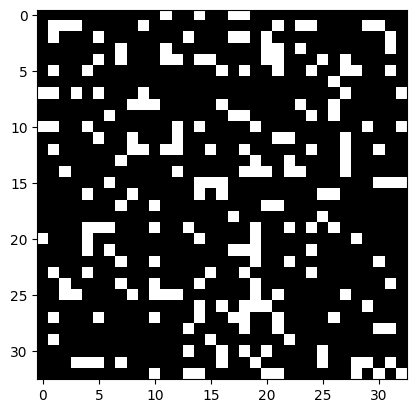

[2,    32] loss: 0.539
[2,    64] loss: 0.518
[2,    96] loss: 0.507
[2,   128] loss: 0.503
[2,   160] loss: 0.498
[2,   192] loss: 0.498
[2,   224] loss: 0.473
[2,   256] loss: 0.478
[2,   288] loss: 0.441
[2,   320] loss: 0.441


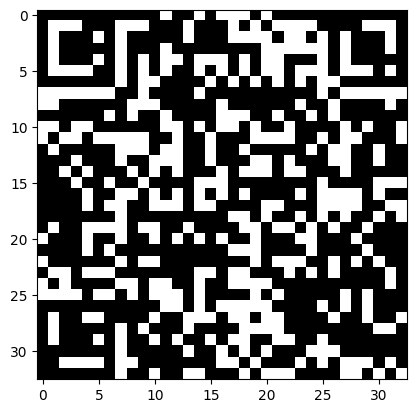

[3,    32] loss: 0.461
[3,    64] loss: 0.449
[3,    96] loss: 0.440
[3,   128] loss: 0.435
[3,   160] loss: 0.449
[3,   192] loss: 0.429
[3,   224] loss: 0.426
[3,   256] loss: 0.446
[3,   288] loss: 0.427
[3,   320] loss: 0.455


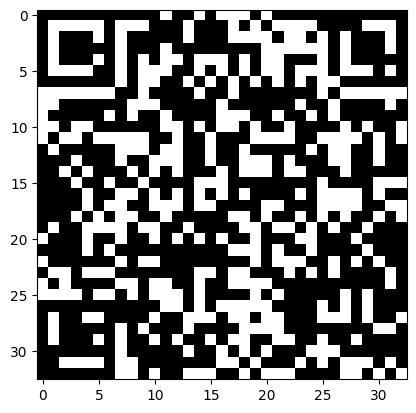

[4,    32] loss: 0.429
[4,    64] loss: 0.428
[4,    96] loss: 0.420
[4,   128] loss: 0.434
[4,   160] loss: 0.437
[4,   192] loss: 0.408
[4,   224] loss: 0.421
[4,   256] loss: 0.404
[4,   288] loss: 0.416
[4,   320] loss: 0.424


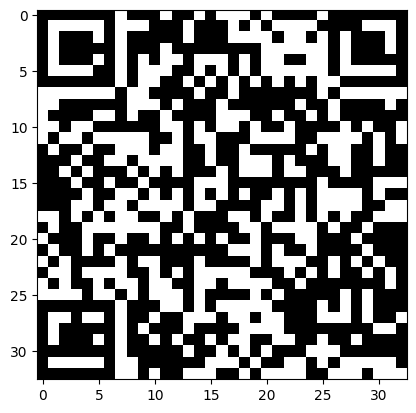

[5,    32] loss: 0.407
[5,    64] loss: 0.401
[5,    96] loss: 0.439
[5,   128] loss: 0.415
[5,   160] loss: 0.412
[5,   192] loss: 0.404
[5,   224] loss: 0.394
[5,   256] loss: 0.402
[5,   288] loss: 0.418
[5,   320] loss: 0.420


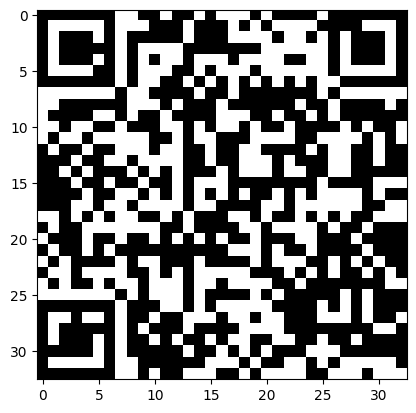

[6,    32] loss: 0.397
[6,    64] loss: 0.406
[6,    96] loss: 0.395
[6,   128] loss: 0.415
[6,   160] loss: 0.402
[6,   192] loss: 0.420
[6,   224] loss: 0.401
[6,   256] loss: 0.397
[6,   288] loss: 0.416
[6,   320] loss: 0.400


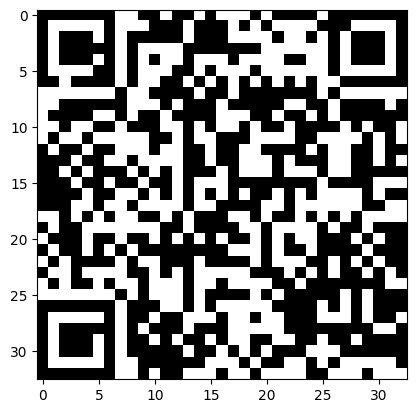

[7,    32] loss: 0.411
[7,    64] loss: 0.399
[7,    96] loss: 0.398
[7,   128] loss: 0.401
[7,   160] loss: 0.387
[7,   192] loss: 0.395
[7,   224] loss: 0.395
[7,   256] loss: 0.403
[7,   288] loss: 0.388
[7,   320] loss: 0.393


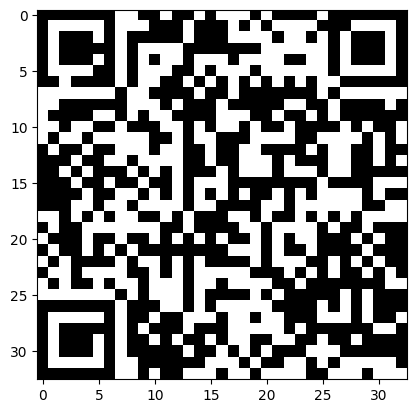

[8,    32] loss: 0.405
[8,    64] loss: 0.392
[8,    96] loss: 0.399
[8,   128] loss: 0.394
[8,   160] loss: 0.396
[8,   192] loss: 0.389
[8,   224] loss: 0.396
[8,   256] loss: 0.393
[8,   288] loss: 0.397
[8,   320] loss: 0.393


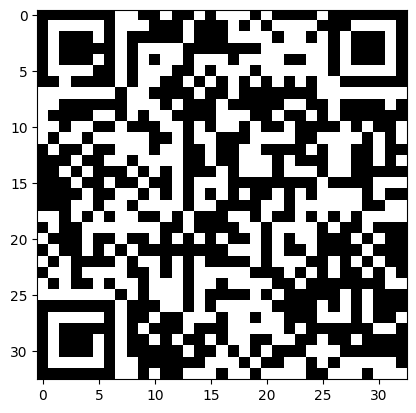

[9,    32] loss: 0.382
[9,    64] loss: 0.385
[9,    96] loss: 0.387
[9,   128] loss: 0.380
[9,   160] loss: 0.387
[9,   192] loss: 0.390
[9,   224] loss: 0.390
[9,   256] loss: 0.377
[9,   288] loss: 0.390
[9,   320] loss: 0.381


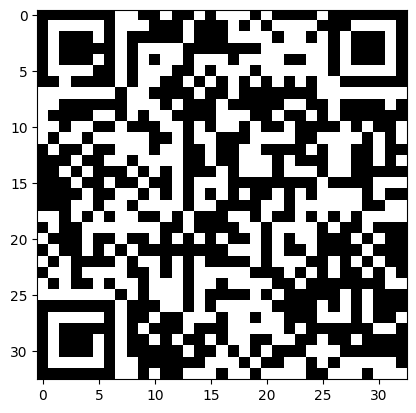

[10,    32] loss: 0.374
[10,    64] loss: 0.373
[10,    96] loss: 0.378
[10,   128] loss: 0.378
[10,   160] loss: 0.387
[10,   192] loss: 0.380
[10,   224] loss: 0.380
[10,   256] loss: 0.371
[10,   288] loss: 0.379
[10,   320] loss: 0.384


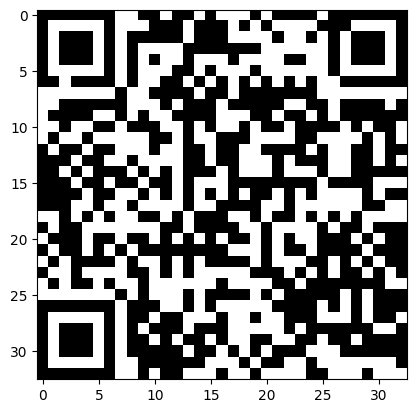

[11,    32] loss: 0.373
[11,    64] loss: 0.367
[11,    96] loss: 0.376
[11,   128] loss: 0.384
[11,   160] loss: 0.390
[11,   192] loss: 0.382
[11,   224] loss: 0.372
[11,   256] loss: 0.380
[11,   288] loss: 0.392
[11,   320] loss: 0.393


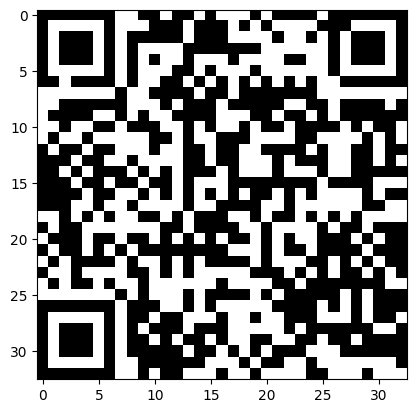

[12,    32] loss: 0.380
[12,    64] loss: 0.386
[12,    96] loss: 0.381
[12,   128] loss: 0.373
[12,   160] loss: 0.401
[12,   192] loss: 0.396
[12,   224] loss: 0.385
[12,   256] loss: 0.375
[12,   288] loss: 0.374
[12,   320] loss: 0.391


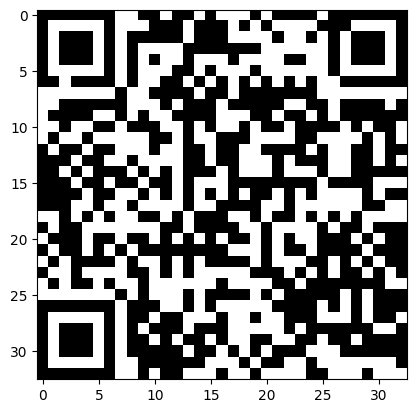

[13,    32] loss: 0.378
[13,    64] loss: 0.370
[13,    96] loss: 0.374
[13,   128] loss: 0.373
[13,   160] loss: 0.368
[13,   192] loss: 0.375
[13,   224] loss: 0.369
[13,   256] loss: 0.371
[13,   288] loss: 0.377
[13,   320] loss: 0.380


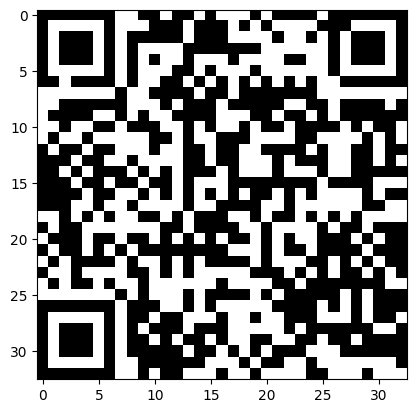

[14,    32] loss: 0.383
[14,    64] loss: 0.369
[14,    96] loss: 0.362
[14,   128] loss: 0.366
[14,   160] loss: 0.374
[14,   192] loss: 0.371
[14,   224] loss: 0.361
[14,   256] loss: 0.370
[14,   288] loss: 0.371
[14,   320] loss: 0.377


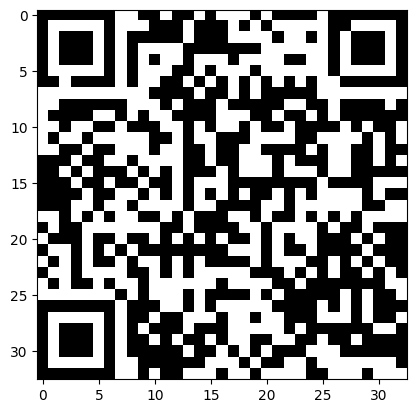

[15,    32] loss: 0.389
[15,    64] loss: 0.363
[15,    96] loss: 0.374
[15,   128] loss: 0.385
[15,   160] loss: 0.365
[15,   192] loss: 0.374
[15,   224] loss: 0.366
[15,   256] loss: 0.372
[15,   288] loss: 0.382
[15,   320] loss: 0.381


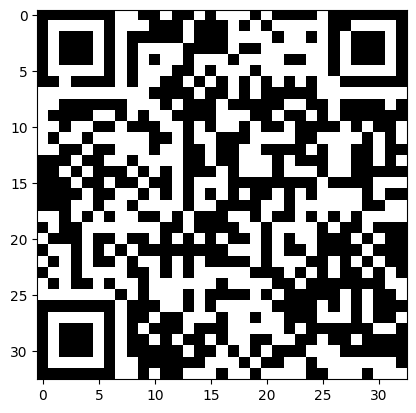

[16,    32] loss: 0.364
[16,    64] loss: 0.372
[16,    96] loss: 0.384
[16,   128] loss: 0.377
[16,   160] loss: 0.370
[16,   192] loss: 0.386
[16,   224] loss: 0.369
[16,   256] loss: 0.373
[16,   288] loss: 0.371
[16,   320] loss: 0.365


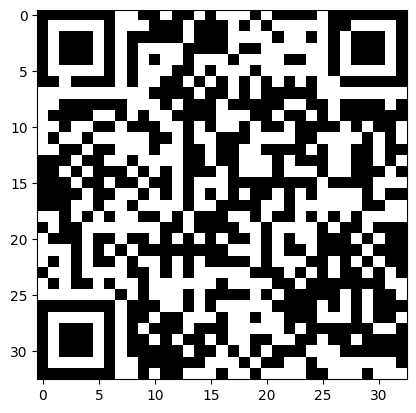

[17,    32] loss: 0.376
[17,    64] loss: 0.378
[17,    96] loss: 0.368
[17,   128] loss: 0.370
[17,   160] loss: 0.374
[17,   192] loss: 0.379
[17,   224] loss: 0.366
[17,   256] loss: 0.359
[17,   288] loss: 0.372
[17,   320] loss: 0.362


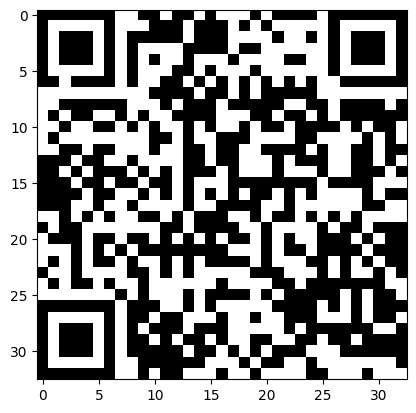

[18,    32] loss: 0.377
[18,    64] loss: 0.359
[18,    96] loss: 0.357
[18,   128] loss: 0.373
[18,   160] loss: 0.364
[18,   192] loss: 0.360
[18,   224] loss: 0.368
[18,   256] loss: 0.373
[18,   288] loss: 0.370
[18,   320] loss: 0.381


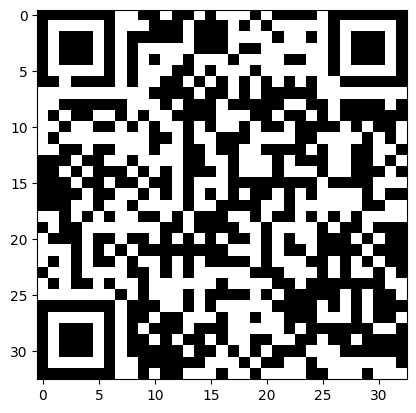

[19,    32] loss: 0.405
[19,    64] loss: 0.384
[19,    96] loss: 0.387
[19,   128] loss: 0.371
[19,   160] loss: 0.369
[19,   192] loss: 0.370
[19,   224] loss: 0.358
[19,   256] loss: 0.366
[19,   288] loss: 0.366
[19,   320] loss: 0.365


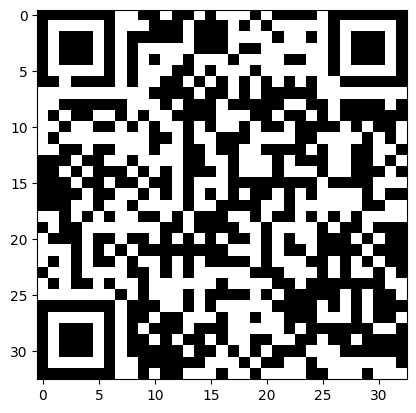

[20,    32] loss: 0.357
[20,    64] loss: 0.372
[20,    96] loss: 0.360
[20,   128] loss: 0.368
[20,   160] loss: 0.385
[20,   192] loss: 0.380
[20,   224] loss: 0.363
[20,   256] loss: 0.366
[20,   288] loss: 0.369
[20,   320] loss: 0.374


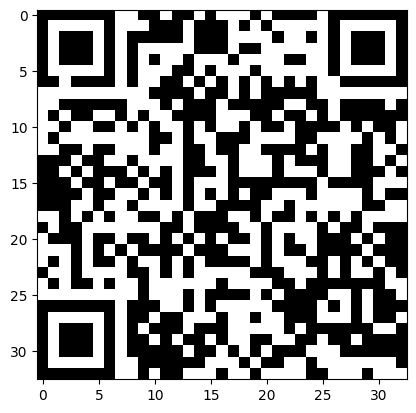

[21,    32] loss: 0.375
[21,    64] loss: 0.355
[21,    96] loss: 0.366
[21,   128] loss: 0.383
[21,   160] loss: 0.364
[21,   192] loss: 0.368
[21,   224] loss: 0.367
[21,   256] loss: 0.373
[21,   288] loss: 0.365
[21,   320] loss: 0.372


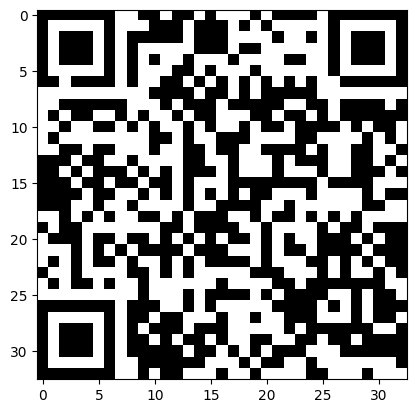

[22,    32] loss: 0.387
[22,    64] loss: 0.375
[22,    96] loss: 0.364
[22,   128] loss: 0.355
[22,   160] loss: 0.375
[22,   192] loss: 0.354
[22,   224] loss: 0.364
[22,   256] loss: 0.367
[22,   288] loss: 0.371
[22,   320] loss: 0.361


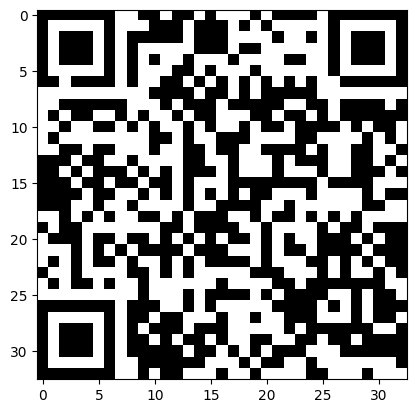

[23,    32] loss: 0.360
[23,    64] loss: 0.361
[23,    96] loss: 0.373
[23,   128] loss: 0.374
[23,   160] loss: 0.374
[23,   192] loss: 0.360
[23,   224] loss: 0.377
[23,   256] loss: 0.365
[23,   288] loss: 0.375
[23,   320] loss: 0.368


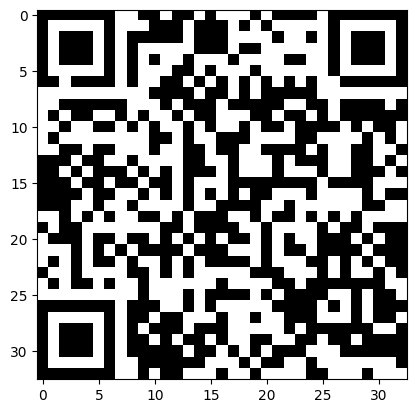

[24,    32] loss: 0.353
[24,    64] loss: 0.363
[24,    96] loss: 0.365
[24,   128] loss: 0.367
[24,   160] loss: 0.353
[24,   192] loss: 0.379
[24,   224] loss: 0.361
[24,   256] loss: 0.359
[24,   288] loss: 0.361
[24,   320] loss: 0.365


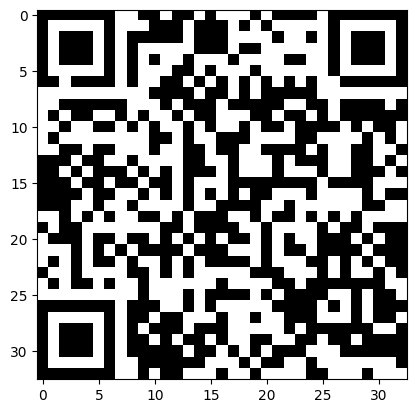

[25,    32] loss: 0.361
[25,    64] loss: 0.360
[25,    96] loss: 0.358
[25,   128] loss: 0.347
[25,   160] loss: 0.362
[25,   192] loss: 0.359
[25,   224] loss: 0.373
[25,   256] loss: 0.357
[25,   288] loss: 0.380
[25,   320] loss: 0.361


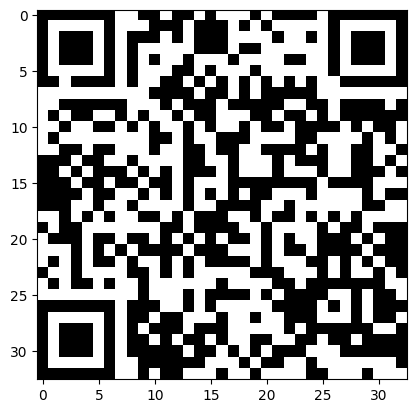

[26,    32] loss: 0.363
[26,    64] loss: 0.355
[26,    96] loss: 0.356
[26,   128] loss: 0.362
[26,   160] loss: 0.378
[26,   192] loss: 0.369
[26,   224] loss: 0.367
[26,   256] loss: 0.366
[26,   288] loss: 0.358
[26,   320] loss: 0.347


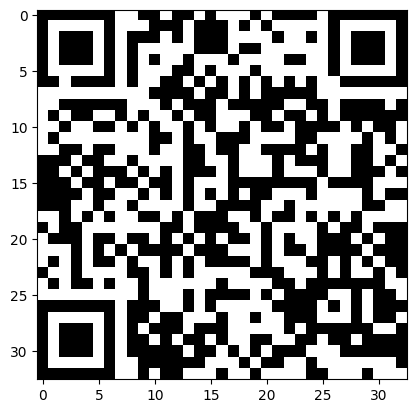

[27,    32] loss: 0.356
[27,    64] loss: 0.365
[27,    96] loss: 0.355
[27,   128] loss: 0.346
[27,   160] loss: 0.358
[27,   192] loss: 0.352
[27,   224] loss: 0.358
[27,   256] loss: 0.366
[27,   288] loss: 0.368
[27,   320] loss: 0.363


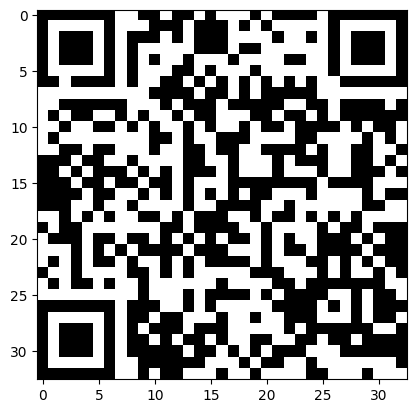

[28,    32] loss: 0.358
[28,    64] loss: 0.355
[28,    96] loss: 0.357
[28,   128] loss: 0.360
[28,   160] loss: 0.361
[28,   192] loss: 0.360
[28,   224] loss: 0.371
[28,   256] loss: 0.372
[28,   288] loss: 0.376
[28,   320] loss: 0.369


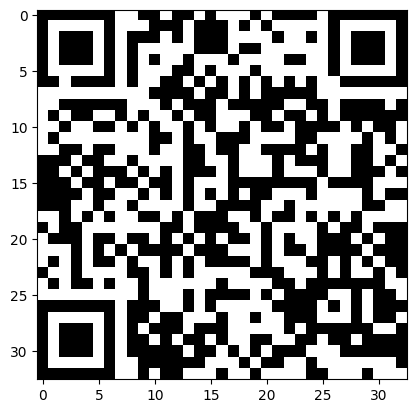

[29,    32] loss: 0.358
[29,    64] loss: 0.350
[29,    96] loss: 0.351
[29,   128] loss: 0.356
[29,   160] loss: 0.360


In [21]:
#model.load_state_dict(torch.load('./Trained_Model2.pt'))
for epoch in range(1000):  # loop over the dataset multiple times
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = data[0]
        labels = data[1]
        unknown = data[2]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 32 == 31:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 32:.3f}')
            running_loss = 0.0
    test()
PATH = './Trained_Model2.pt'
torch.save(model.state_dict(), PATH)